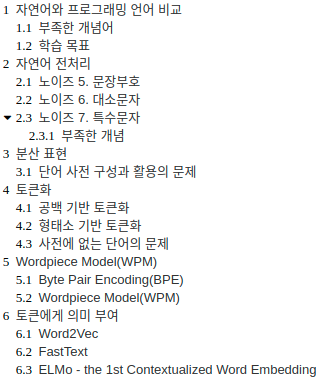

# 자연어와 프로그래밍 언어 비교

||자연어(Natural Language)|    프로그래밍 언어(Programming Language)|
|---|:---:|:---:|
|문법|문맥의존 언어 (Context Sensitive)|문맥자유 언어 (Context Free)|

## 부족한 개념어
+ 구문 분석(parsing) 
  => 검퓨터 과학에서 parsing은 일련의 문자열을 의미있는 token(어휘 분석의 단위)으로 분해하고 그것들로 이루어진 parse tree를 만드는 과정 
  
+ Parser
  => parsing을 수행하는 프로그램. 즉 parser가 parsing을 하는 것이다.  
  
+ [참조](https://na27.tistory.com/230)
 

'아버지가방에들어가신다.'   
1) 아버지가 방에 들어가신다.  
2) 아버지 가방에 들어가신다.  

위의 예시처럼 문맥의존 언어는 의미의 모호성을 가지기도 한다.  

그래서 기계적으로 언어를 해석하는 파서를 만들 때는 이런 모호성을 가지고 있지 않은 '문맥자유 언어'를 사용해야 한다.  

## 학습 목표

자연어 전처리, 토큰화 과정을 이해한다.  
분산표현에 대한 직관적 이해를 얻는다.  
문장 데이터를 정제하는 방법을 배운다.  
토큰화의 여러 가지 기법들을 배운다.  
단어 Embedding을 구축하는 방법에 대해 가볍게 맛본다.  

# 자연어 전처리
간단하게 노이즈를 제거하는 과정이라고 할 수 있다. 이때 노이즈는  

1. 불완전한 문장으로 구성된 대화의 경우  
2. 문장의 길이가 너무 길거나 짧은 경우  
3. 채팅 데이터에서 문장 시간 간격이 너무 긴 경우  
4. 바람직하지 않은 문장의 사용  

또한 가장 단순한 노이즈에는  

5. 문장부호  
6. 대소문자  
7. 특수문자  


가 있다.  


## 노이즈 5. 문장부호
문장부호와 단어를 분리해서 컴퓨터가 단어와 문장부호가 한 단어가 아님을 알게 해준다.  
-> 문장부호 앞,뒤로 공백을 넣어준다  
-> 코드는 아래와 같다.

In [1]:
def pad_punctuation(sentence, punc):
    for p in punc:
        sentence = sentence.replace(p, " " + p + " ") # replace에 주목!! 이 얼마나 편안한가!

    return sentence

sentence = "Hi, my name is john."

print(pad_punctuation(sentence, [".", "?", "!", ","]))

Hi ,  my name is john . 


## 노이즈 6. 대소문자

파이썬은 처음 배울 때, 이런 간단한 기능도 있구나 했었는데 이렇게 중요한 자리에서 쓰일 줄은 몰랐다.  
바로 lower()와 upper(). 아주 간단하다  
코드는 아래와 같다


In [2]:
sentence = "First, open the first chapter."

print(sentence.lower())
print(sentence.upper())

first, open the first chapter.
FIRST, OPEN THE FIRST CHAPTER.


## 노이즈 7. 특수문자

특수문자는 무한하기 때문에 여집합처럼 전체 문자에서 우리가 쓰이는 것만 제외하는 방법을 이용한다.

In [3]:
import re

sentence = "He is a ten-year-old boy."
sentence = re.sub("([^a-zA-Z.,?!])", " ", sentence)

print(sentence)

He is a ten year old boy.


### 부족한 개념
+ [re 패키지](https://hamait.tistory.com/342)

In [4]:
# 모든 전처리가 합쳐진 코드  
# From The Project Gutenberg
# (https://www.gutenberg.org/files/2397/2397-h/2397-h.htm)

corpus = \
"""
In the days that followed I learned to spell in this uncomprehending way a great many words, among them pin, hat, cup and a few verbs like sit, stand and walk. 
But my teacher had been with me several weeks before I understood that everything has a name.
One day, we walked down the path to the well-house, attracted by the fragrance of the honeysuckle with which it was covered. 
Some one was drawing water and my teacher placed my hand under the spout. 
As the cool stream gushed over one hand she spelled into the other the word water, first slowly, then rapidly. 
I stood still, my whole attention fixed upon the motions of her fingers. 
Suddenly I felt a misty consciousness as of something forgotten—a thrill of returning thought; and somehow the mystery of language was revealed to me. 
I knew then that "w-a-t-e-r" meant the wonderful cool something that was flowing over my hand. 
That living word awakened my soul, gave it light, hope, joy, set it free! 
There were barriers still, it is true, but barriers that could in time be swept away.
""" 

def cleaning_text(text, punc, regex):
    # 노이즈 유형 (1) 문장부호 공백추가
    for p in punc:
        text = text.replace(p, " " + p + " ")

    # 노이즈 유형 (2), (3) 소문자화 및 특수문자 제거
    text = re.sub(regex, " ", text).lower()

    return text

print(cleaning_text(corpus, [".", ",", "!", "?"], "([^a-zA-Z0-9.,?!\n])"))


in the days that followed i learned to spell in this uncomprehending way a great many words ,  among them pin ,  hat ,  cup and a few verbs like sit ,  stand and walk .  
but my teacher had been with me several weeks before i understood that everything has a name . 
one day ,  we walked down the path to the well house ,  attracted by the fragrance of the honeysuckle with which it was covered .  
some one was drawing water and my teacher placed my hand under the spout .  
as the cool stream gushed over one hand she spelled into the other the word water ,  first slowly ,  then rapidly .  
i stood still ,  my whole attention fixed upon the motions of her fingers .  
suddenly i felt a misty consciousness as of something forgotten a thrill of returning thought  and somehow the mystery of language was revealed to me .  
i knew then that  w a t e r  meant the wonderful cool something that was flowing over my hand .  
that living word awakened my soul ,  gave it light ,  hope ,  joy ,  set it

# 분산 표현

희소 표현과 분산 표현은 추노에 뒤늦게 들어와서 처음으로 발표를 맡은 부분이었는데, 노드에서 보니 반가웠다.  
[김인유의 딥러닝 레이어](https://docs.google.com/presentation/d/1EHpacumbPNcZA4nLvOjpWSyANW_1C2Mmw3ajm8SyKwk/edit?usp=sharing)  
위의 발표 자료의 내용처럼 분산 표현은 단어의 추상적인 속성들이 고차원에 골고루 분산되어서 그 사이의 거리로 의미의 유사도를 확인할 수 있다.  

## 단어 사전 구성과 활용의 문제

분산 표현을 활용해 단어 사전은 만들었지만, 컴퓨터는 문장을 단어 단위로 정화하게 끊어 읽지 못한다는 문제점이 있다.  
-> 토큰화로 해결해보자

# 토큰화

'친구는 나와 밥을 먹는다'라는 문장을 단어 단위로 쪼개 보자.  
1) 친구는, 나와, 밥을, 먹는다 -> 4개  
2) 친구, 는, 나, 와, 밥, 을, 먹는다 -> 7개  
어떤 기준으로 쪼개야 할까?  

우선 쪼개진 각 단어들을 토큰(Token)이라 하고,   
쪼개진 기준은 토큰화기법에 의해 정해진다.

## 공백 기반 토큰화

노이즈 전처리 중에서 문장부호를 단어와 구별할 때 공백을 넣어서 구별시켰는데,  
공백 기반 토큰화를 위한 것이었다.  
코드는 아래에

In [5]:
corpus = \
"""
in the days that followed i learned to spell in this uncomprehending way a great many words ,  among them pin ,  hat ,  cup and a few verbs like sit ,  stand and walk .  
but my teacher had been with me several weeks before i understood that everything has a name . 
one day ,  we walked down the path to the well house ,  attracted by the fragrance of the honeysuckle with which it was covered .  
some one was drawing water and my teacher placed my hand under the spout .  
as the cool stream gushed over one hand she spelled into the other the word water ,  first slowly ,  then rapidly .  
i stood still ,  my whole attention fixed upon the motions of her fingers .  
suddenly i felt a misty consciousness as of something forgotten a thrill of returning thought  and somehow the mystery of language was revealed to me .  
i knew then that  w a t e r  meant the wonderful cool something that was flowing over my hand .  
that living word awakened my soul ,  gave it light ,  hope ,  joy ,  set it free !  
there were barriers still ,  it is true ,  but barriers that could in time be swept away . 
"""

tokens = corpus.split()

print("문장이 포함하는 Tokens:", tokens)

문장이 포함하는 Tokens: ['in', 'the', 'days', 'that', 'followed', 'i', 'learned', 'to', 'spell', 'in', 'this', 'uncomprehending', 'way', 'a', 'great', 'many', 'words', ',', 'among', 'them', 'pin', ',', 'hat', ',', 'cup', 'and', 'a', 'few', 'verbs', 'like', 'sit', ',', 'stand', 'and', 'walk', '.', 'but', 'my', 'teacher', 'had', 'been', 'with', 'me', 'several', 'weeks', 'before', 'i', 'understood', 'that', 'everything', 'has', 'a', 'name', '.', 'one', 'day', ',', 'we', 'walked', 'down', 'the', 'path', 'to', 'the', 'well', 'house', ',', 'attracted', 'by', 'the', 'fragrance', 'of', 'the', 'honeysuckle', 'with', 'which', 'it', 'was', 'covered', '.', 'some', 'one', 'was', 'drawing', 'water', 'and', 'my', 'teacher', 'placed', 'my', 'hand', 'under', 'the', 'spout', '.', 'as', 'the', 'cool', 'stream', 'gushed', 'over', 'one', 'hand', 'she', 'spelled', 'into', 'the', 'other', 'the', 'word', 'water', ',', 'first', 'slowly', ',', 'then', 'rapidly', '.', 'i', 'stood', 'still', ',', 'my', 'whole', 'attenti

잘 토큰화 되었지만 'days' 와 'day' 처럼 사실상 같은 단어를 다르게 구별한다는 점에서 아쉬운 토큰화이다.

## 형태소 기반 토큰화

'오늘도 공부만 한다' -> 오늘, 도, 공부, 만, 한다  
이렇게 한글은 띄어쓰기가 아닌 형태소 기반으로 토큰화를 해줘야 한다.  
한국어 형태소 분석기의 대표 2가지  
>1. KoNLPy
2. khaiii

KoNLPy는 내부적으로 5가지의 형태소 분석 Class를 포함  
형태소 분석기들은 특수한 문장(띄어쓰기 X / 오탈자) 처리 성능, 속도 측면에서 차이를 보입니다.   
[한국어 형태소 분석기 성능 비교](https://iostream.tistory.com/144)  

실제로 한국어 형태소 분석기를 비교해보자  

In [1]:
from konlpy.tag import Hannanum,Kkma,Komoran,Mecab,Okt

In [2]:
import khaiii # from 카카오

api = khaiii.KhaiiiApi()
api.open()

In [3]:
# Khaiii를 konlpy tokenizer처럼 사용하기 위한 wrapper class입니다. 

class Khaiii():
    def pos(self, phrase, flatten=True, join=False):
        """POS tagger.

        :param flatten: If False, preserves eojeols.
        :param join: If True, returns joined sets of morph and tag.

        """
        sentences = phrase.split('\n')
        morphemes = []
        if not sentences:
            return morphemes

        for sentence in sentences:
            for word in api.analyze(sentence):
                result = [(m.lex, m.tag) for m in word.morphs]
                if join:
                    result = ['{}/{}'.format(m.lex, m.tag) for m in word.morphs]

                morphemes.append(result)

        if flatten:
            return sum(morphemes, [])

        return morphemes

In [6]:
tokenizer_list = [Hannanum(),Kkma(),Komoran(),Mecab(),Okt(),Khaiii()]

kor_text = '코로나바이러스는 2019년 12월 중국 우한에서 처음 발생한 뒤 전 세계로 확산된, 새로운 유형의 호흡기 감염 질환입니다.'

for tokenizer in tokenizer_list:
    print('[{}] \n{}'.format(tokenizer.__class__.__name__, tokenizer.pos(kor_text)),'\n','--------------------')

[Hannanum] 
[('코로나바이러스', 'N'), ('는', 'J'), ('2019년', 'N'), ('12월', 'N'), ('중국', 'N'), ('우한', 'N'), ('에서', 'J'), ('처음', 'M'), ('발생', 'N'), ('하', 'X'), ('ㄴ', 'E'), ('뒤', 'N'), ('전', 'N'), ('세계', 'N'), ('로', 'J'), ('확산', 'N'), ('되', 'X'), ('ㄴ', 'E'), (',', 'S'), ('새롭', 'P'), ('은', 'E'), ('유형', 'N'), ('의', 'J'), ('호흡기', 'N'), ('감염', 'N'), ('질환', 'N'), ('이', 'J'), ('ㅂ니다', 'E'), ('.', 'S')] 
 --------------------
[Kkma] 
[('코로나', 'NNG'), ('바', 'NNG'), ('이러', 'MAG'), ('슬', 'VV'), ('는', 'ETD'), ('2019', 'NR'), ('년', 'NNM'), ('12', 'NR'), ('월', 'NNM'), ('중국', 'NNG'), ('우', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('에', 'VV'), ('서', 'ECD'), ('처음', 'NNG'), ('발생', 'NNG'), ('하', 'XSV'), ('ㄴ', 'ETD'), ('뒤', 'NNG'), ('전', 'NNG'), ('세계', 'NNG'), ('로', 'JKM'), ('확산', 'NNG'), ('되', 'XSV'), ('ㄴ', 'ETD'), (',', 'SP'), ('새', 'NNG'), ('롭', 'XSA'), ('ㄴ', 'ETD'), ('유형', 'NNG'), ('의', 'JKG'), ('호흡기', 'NNG'), ('감염', 'NNG'), ('질환', 'NNG'), ('이', 'VCP'), ('ㅂ니다', 'EFN'), ('.', 'SF')] 
 --------------------
[Komoran] 
[

## 사전에 없는 단어의 문제
OOV(Out-Of-Vocabulary) 문제 : 새로 등장한(본 적 없는) 단어에 대해 약한 모습  
이를 해결하고자한 -> Wordpiece Model  

# Wordpiece Model(WPM)

컴퓨터가 단어를 볼 때, 접두사와 접미사처럼 볼 수 있도록 하는 방법    
WPM을 알기 전에 Byte Pair Encoding(BPE)대해 알아보자  


## Byte Pair Encoding(BPE)

BPE 알고리즘이 처음에 고안되었을 때는 데이터 압축을 위해 생겨났다. 데이터 중 빈도수가 가장 큰 바이트 쌍을 새로운 단어로 치환해서 압축하는 작업을 반복적으로 진행한다.  예시는 아래와 같다  
```
aaabdaaabac # 가장 많이 등장한 바이트 쌍 "aa"를 "Z"로 치환합니다. # 쌍이니까 2개씩 묶나보다
→ 
ZabdZabac   # "aa" 총 두 개가 치환되어 4바이트를 2바이트로 압축하였습니다.
Z=aa        # 그다음 많이 등장한 바이트 쌍 "ab"를 "Y"로 치환합니다.
→ 
ZYdZYac     # "ab" 총 두 개가 치환되어 4바이트를 2바이트로 압축하였습니다.
Z=aa        # 여기서 작업을 멈추어도 되지만, 치환된 바이트에 대해서도 진행한다면
Y=ab        # 가장 많이 등장한 바이트 쌍 "ZY"를 "X"로 치환합니다.
→ 
XdXac
Z=aa
Y=ab
X=ZY       # 압축이 완료되었습니다!
```
이 알고리즘을 토큰화에 적용하면 이렇다  
모든 단어를 바이트의 조합으로 취급하고 빈도수가 많은 바이트 쌍을 합치면 접두사나 접미어의 의미를 캐치할 수 있고 out-of-vocabulary를 완전히 해결할 수 있다.  
논문 : [Neural Machine Translation of Rare Words with Subword Units](https://arxiv.org/pdf/1508.07909.pdf)  
위의 논문에서 제공해주는 예제를 돌리면서 동작 방식을 톺아보자

In [7]:
import re, collections

# 임의의 데이터에 포함된 단어들입니다.
# 우측의 정수는 임의의 데이터에 해당 단어가 포함된 빈도수입니다.
vocab = {
    'l o w '      : 5,
    'l o w e r '  : 2,
    'n e w e s t ': 6,
    'w i d e s t ': 3
}

num_merges = 5

def get_stats(vocab):
    """
    단어 사전을 불러와
    단어는 공백 단위로 쪼개어 문자 list를 만들고
    빈도수와 쌍을 이루게 합니다. (symbols)
    """
    pairs = collections.defaultdict(int)
    
    for word, freq in vocab.items():
        symbols = word.split()

        for i in range(len(symbols) - 1):             # 모든 symbols를 확인하여 
            pairs[symbols[i], symbols[i + 1]] += freq  # 문자 쌍의 빈도수를 저장합니다. 
        
    return pairs

def merge_vocab(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
        
    return v_out, pair[0] + pair[1]

In [8]:
token_vocab = []

for i in range(num_merges):
    print(">> Step {0}".format(i + 1))
    
    pairs = get_stats(vocab)
    best = max(pairs, key=pairs.get)  # 가장 많은 빈도수를 가진 문자 쌍을 반환합니다.
    vocab, merge_tok = merge_vocab(best, vocab)
    print("다음 문자 쌍을 치환:", merge_tok)
    print("변환된 Vocab:\n", vocab, "\n")
    
    token_vocab.append(merge_tok)
    
print("Merge Vocab:", token_vocab)

>> Step 1
다음 문자 쌍을 치환: es
변환된 Vocab:
 {'l o w ': 5, 'l o w e r ': 2, 'n e w es t ': 6, 'w i d es t ': 3} 

>> Step 2
다음 문자 쌍을 치환: est
변환된 Vocab:
 {'l o w ': 5, 'l o w e r ': 2, 'n e w est ': 6, 'w i d est ': 3} 

>> Step 3
다음 문자 쌍을 치환: lo
변환된 Vocab:
 {'lo w ': 5, 'lo w e r ': 2, 'n e w est ': 6, 'w i d est ': 3} 

>> Step 4
다음 문자 쌍을 치환: low
변환된 Vocab:
 {'low ': 5, 'low e r ': 2, 'n e w est ': 6, 'w i d est ': 3} 

>> Step 5
다음 문자 쌍을 치환: ne
변환된 Vocab:
 {'low ': 5, 'low e r ': 2, 'ne w est ': 6, 'w i d est ': 3} 

Merge Vocab: ['es', 'est', 'lo', 'low', 'ne']


BPE의 놀라운 점은 아무리 큰 데이터도 원하는 크기로 OOV 문제없이 사전을 정의할 수 있다 -> ???  

Embedding 레이어는 "단어의 개수 x Embedding 차원 수"의 Weight를 생성하기 때문에 단어의 개수가 줄어드는 것은 곧 메모리의 절약으로 이어집니다. 많은 데이터가 곧 정확도로 이어지기 때문에 이런 기여는 굉장히 meaningful!

## Wordpiece Model(WPM)

구글이 BPE를 변형해서 제안한 알고리즘이다.  
기존과 비교할 때, 두 가지의 차별성을 가지는데   
>1. 공백 복원을 위해 단어의 시작 부분에 언더바 _ 를 추가하고
2. 빈도수 기반이 아닌 가능도(Likelihood)를 증가시키는 방향으로 문자 쌍을 합침

\[i, am, a, b, o, y, a, n, d, you, are, a, gir, l] -> [_i, _am, _a, _b, o, y, _a, n, d, _you, _are, _a, _gir, l]  
이런식으로 토큰화하면 문장을 복원할 때, 1) 모든 토큰을 합친 후, 2) 언더바 _를 공백으로 치환하게 되어서 간편하다.  

두번째 문항은 아래 논문 3절과 4절에 자세하게 나와 있다.  
[JAPANESE AND KOREAN VOICE SEARCH](https://static.googleusercontent.com/media/research.google.com/ko//pubs/archive/37842.pdf)  

토큰끼리 유사도를 표현할 수 있게 하는 알고리즘을 배워보자.

# 토큰에게 의미 부여

## Word2Vec

동시에(한 문장에) 등장하는 단어끼리는 연관성이 있다라는 아이디어로 시작된 알고리즘이다.  
[위키독스/Word2Vec](https://wikidocs.net/22660)  
+ 워드투벡터에는 두가지 방법이 있다. CBOW(Continuous Bag of Words)와 Skip-Gram  
  CBOW는 주변에 있는 단어들을 가지고, 중간에 있는 단어들을 예측하는 방법  
  반대로, Skip-Gram은 중간에 있는 단어로 주변 단어들을 예측하는 방법
  
+ Word2Vec은 딥 러닝 모델(Deep Learning Model)은 아니라는 점입니다. 보통 딥 러닝이라함은, 입력층과 출력층 사이의 은닉층의 개수가 충분히 쌓인 신경망을 학습할 때를 말하는데 Word2Vec는 입력층과 출력층 사이에 하나의 은닉층만이 존재  



## FastText

워드투벡터에서는 빈도수가 작은 단어는 최악의 경우 한 번의 연산만 거치기 때문에 초기화 값가 별반 다르지 않은 상태로 알고리즘이 정리될 수 있다.  
이런 문제를 해결하기 위해서 Fasttext 가 BPE와 비슷한 아이디어를 적용했다.  
[한국어를 위한 어휘 임베딩의 개발 -1-](https://brunch.co.kr/@learning/7)  


## ELMo - the 1st Contextualized Word Embedding

위의 두 방법도 훌륭하지만 고정적이라는 단점이 있다. 이때 고정적이라는 것은 동음이의어를 처리할 수 없다는 뜻이다. 동음이의어를 이해하려면 문맥 활용이 필수적이다. 동음이의어 주변에 놓인 단어와 맥락이 고려되어야 한다. 이런 개념을 Contextualized Word Embedding이라 한다.  
[전이 학습 기반 NLP (1): ELMo](https://brunch.co.kr/@learning/12)  
ELMo나 BERT 등 지금도 많이 사용되고 있는 Contextualized Word Embedding 모델의 구조나 메커니즘 이해를 고잉디퍼동안의 목표로 설정하고 공부하자.